#  UNDERSTAND THE PROBLEM STATEMENT 

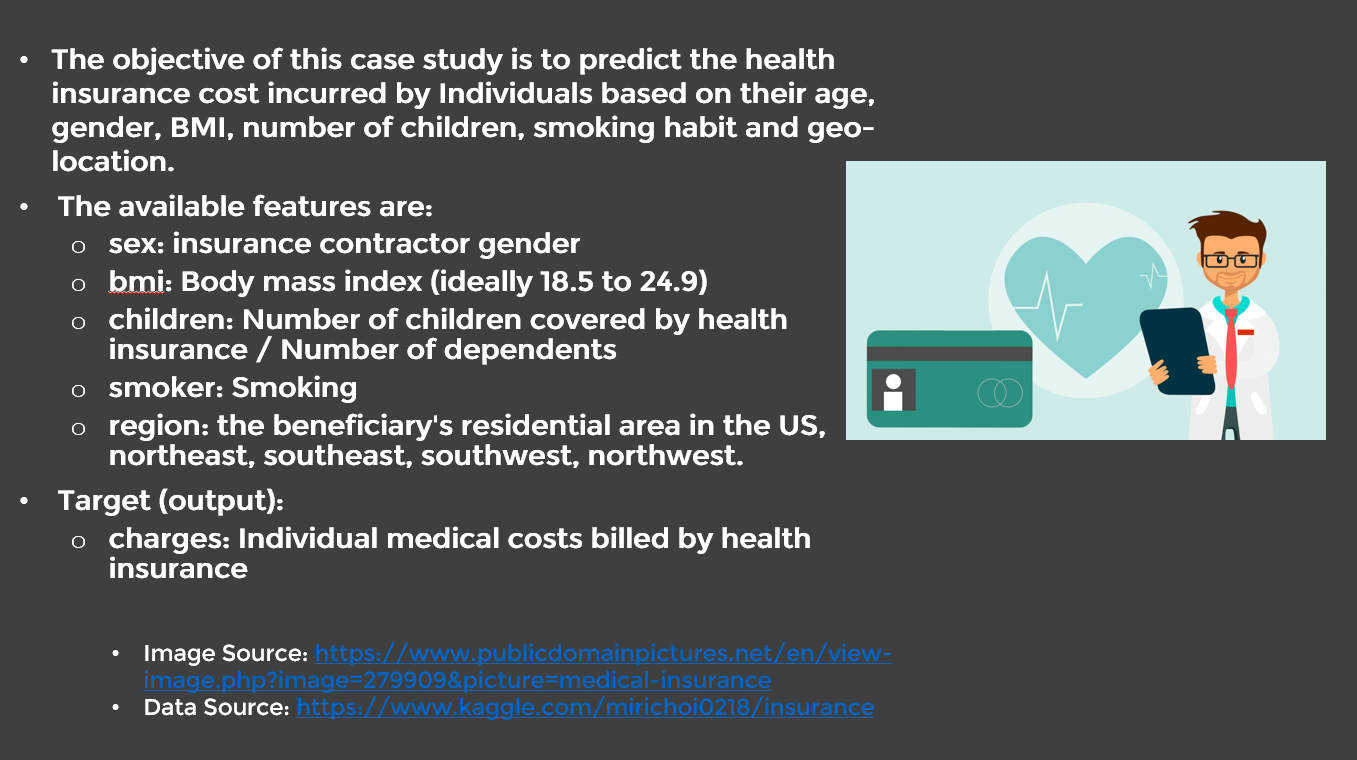

#  IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
insurance_df=pd.read_csv(r"C:\Users\user\Downloads\insurance (3).csv")

In [3]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [4]:
insurance_df.isnull().sum().sum()

0

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS - PART 1

<AxesSubplot:>

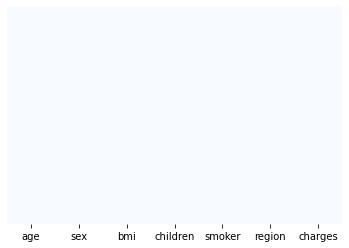

In [5]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [6]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# TASK #4: PERFORM FEATURE ENGINEERING

In [8]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
# convert categorical variable to numerical


In [10]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [13]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [14]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [16]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [17]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [18]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0,0,1
1,18,male,33.770,1,0,southeast,1725.55230,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,1,0,0


In [19]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,1,16884.92400,0,0,1
1,18,male,33.770,1,0,1725.55230,0,1,0
2,28,male,33.000,3,0,4449.46200,0,1,0
3,33,male,22.705,0,0,21984.47061,1,0,0
4,32,male,28.880,0,0,3866.85520,1,0,0


# PERFORM DATA VISUALIZATION

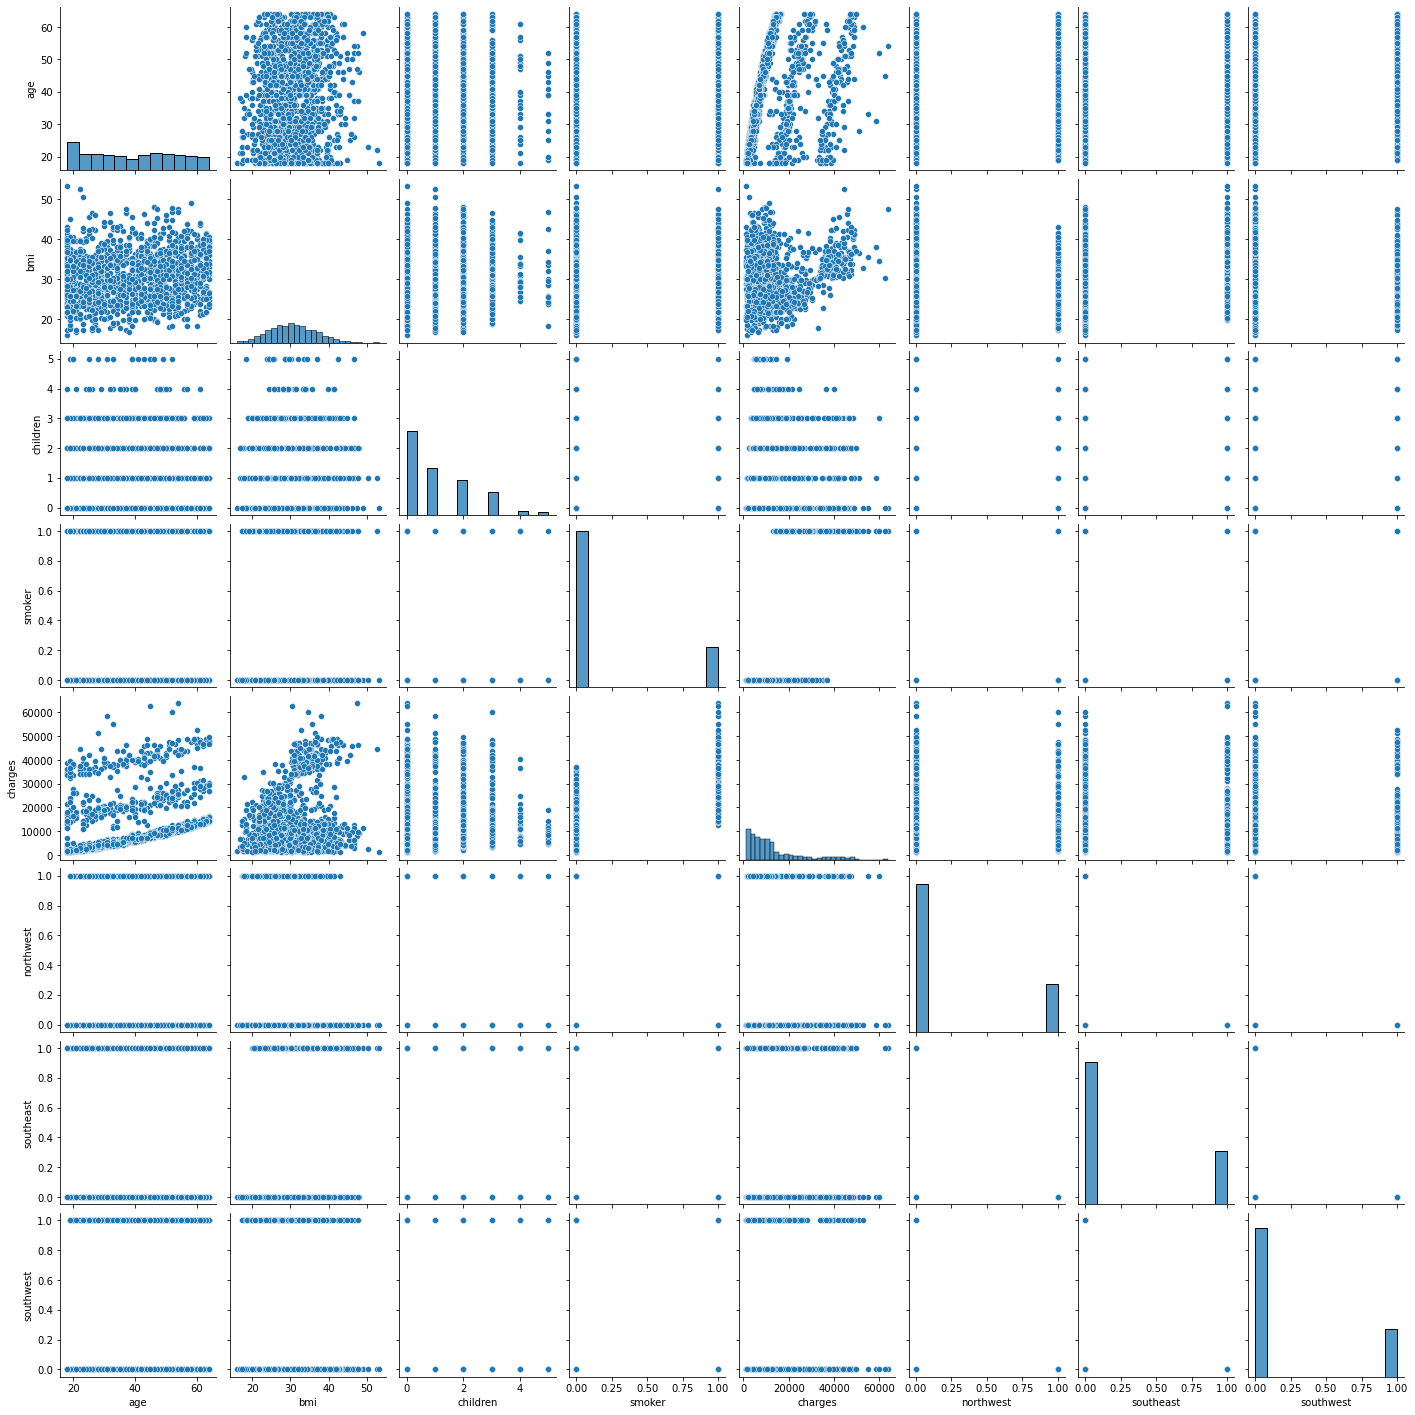

In [21]:
# plot pairplot
sns.pairplot(insurance_df)

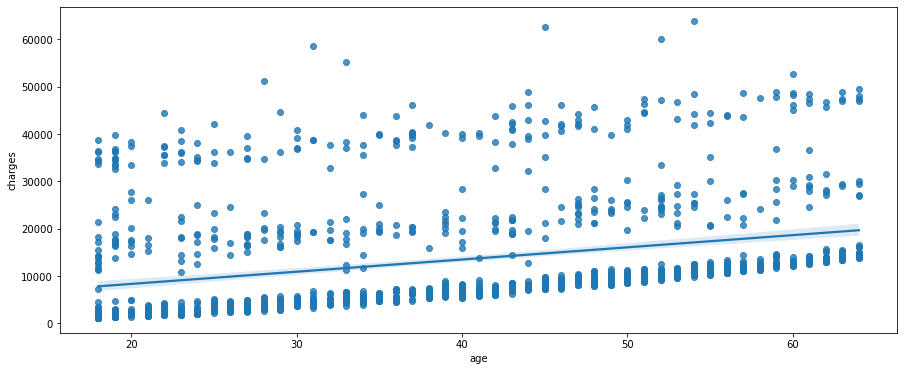

In [22]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

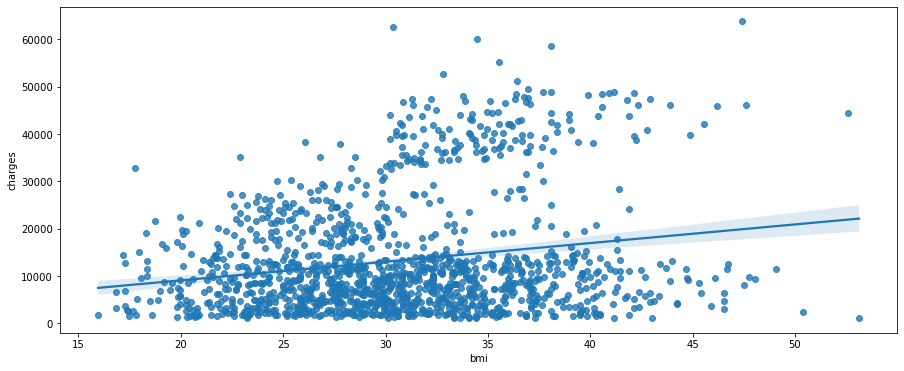

In [23]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

# TASK #6: CREATE TRAINING AND TESTING DATASET

In [24]:
insurance_df['sex']=insurance_df['sex'].astype('category')
insurance_df['sex']=insurance_df['sex'].cat.codes

In [25]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int8   
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(3), int8(1), uint8(3)
memory usage: 57.6 KB


In [26]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [27]:
X=insurance_df[['age', 'sex', 'bmi', 'children', 'smoker','northwest',
       'southeast', 'southwest']]
y=insurance_df[['charges']]

In [28]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [29]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [30]:
X.shape

(1338, 8)

In [31]:
y.shape

(1338, 1)

In [32]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [33]:
#y = y.reshape(-1,1)

In [34]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [35]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


In [36]:
X

array([[-1.4387642 , -1.0105187 , -0.45332006, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [-1.5099654 ,  0.9895908 ,  0.5096212 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-0.79795355,  0.9895908 ,  0.38330686, ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       ...,
       [-1.5099654 , -1.0105187 ,  1.0148778 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-1.2963619 , -1.0105187 , -0.79781353, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [ 1.5516857 , -1.0105187 , -0.261388  , ...,  1.765481  ,
        -0.61132365, -0.5664179 ]], dtype=float32)

# TASK #7: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [38]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [39]:
regresssion_model_sklearn=LinearRegression()

In [40]:
regresssion_model_sklearn.fit(X_train,y_train)

LinearRegression()

In [41]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7587463326461175

In [42]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [43]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [44]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5978.691 
MSE = 35744750.0 
MAE = 4133.1445 
R2 = 0.7587463384421279 
Adjusted R2 = 0.7512944878920778


<AxesSubplot:>

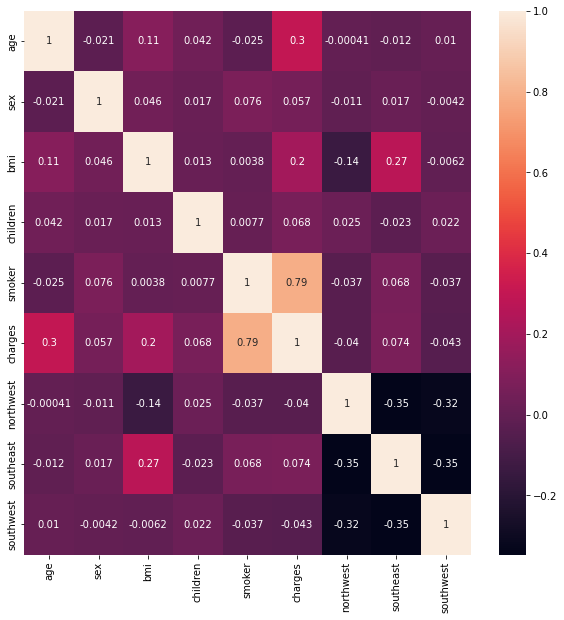

In [46]:
plt.figure(figsize = (10, 10))
sns.heatmap(insurance_df.corr(), annot = True)
# smoker and age have positive correlations with charges